In [3]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import math

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_regression

In [14]:
Comms = pd.read_csv(r"C:\Users\Owner\Documents\DSC 478\communities.csv")


In [15]:
Comms.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [16]:
Comms.shape

(1994, 100)

In [17]:
# what are the basic statistics for each of the variable?
Comms.describe(include="all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Auburncity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [18]:
# handle missing data
np.sum(np.array(pd.isnull(Comms)),0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
Comms["OtherPerCap"].unique()

array(['0.36', '0.22', '0.28', '0.51', '0.48', '0.24', '0.18', '0.29',
       '0.17', '0.34', '0.35', '0.13', '0.33', '0.2', '1', '0.72', '0',
       '0.19', '0.3', '0.38', '0.14', '0.26', '0.64', '0.25', '0.37',
       '0.16', '0.15', '0.76', '0.4', '0.42', '0.23', '0.31', '0.32',
       '0.5', '0.66', '0.21', '0.7', '0.27', '0.11', '0.55', '0.95',
       '0.03', '0.45', '0.08', '0.43', '0.62', '0.02', '0.41', '?',
       '0.39', '0.88', '0.71', '0.44', '0.47', '0.09', '0.53', '0.1',
       '0.46', '0.05', '0.52', '0.75', '0.06', '0.93', '0.12', '0.77',
       '0.69', '0.86', '0.73', '0.67', '0.84', '0.81', '0.54', '0.59',
       '0.01', '0.68', '0.98', '0.04', '0.61', '0.9', '0.57', '0.49',
       '0.56', '0.07', '0.92', '0.6', '0.94', '0.63', '0.87', '0.79',
       '0.99', '0.58', '0.83', '0.85', '0.8', '0.82', '0.74', '0.65',
       '0.89'], dtype=object)

In [20]:
Comms.dtypes


state                    int64
communityname           object
population             float64
householdsize          float64
racepctblack           float64
                        ...   
PctSameState85         float64
LandArea               float64
PopDens                float64
PctUsePubTrans         float64
ViolentCrimesPerPop    float64
Length: 100, dtype: object

In [21]:
Comms.OtherPerCap = pd.to_numeric(Comms.OtherPerCap, errors='coerce') # coerce arg turns failures into NaN
Comms.dtypes

state                    int64
communityname           object
population             float64
householdsize          float64
racepctblack           float64
                        ...   
PctSameState85         float64
LandArea               float64
PopDens                float64
PctUsePubTrans         float64
ViolentCrimesPerPop    float64
Length: 100, dtype: object

In [22]:
Comms = Comms.dropna(axis=0)

In [23]:
# seperate the target attribute
y = np.array(Comms.ViolentCrimesPerPop)

x = np.array(Comms.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis=1))

In [24]:
x.shape


(1993, 97)

In [25]:
y.shape

(1993,)

In [26]:
# Function from Machine Learning in Action Book

def standRegres(xArr, yArr):
    xMat = np.matrix(xArr); yMat = np.matrix(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    else:
        ws = xTx.I * (xMat.T*yMat)
        return ws

In [27]:
# Prep the x_var set such that we can have a constant
x_var = np.array(x)
x_var = np.array([np.concatenate((v,[1])) for v in x_var])
x_var

array([[0.19, 0.33, 0.02, ..., 0.26, 0.2 , 1.  ],
       [0.  , 0.16, 0.12, ..., 0.12, 0.45, 1.  ],
       [0.  , 0.42, 0.49, ..., 0.21, 0.02, 1.  ],
       ...,
       [0.16, 0.37, 0.25, ..., 0.32, 0.18, 1.  ],
       [0.08, 0.51, 0.06, ..., 0.38, 0.33, 1.  ],
       [0.2 , 0.78, 0.14, ..., 0.3 , 0.05, 1.  ]])

In [28]:

# Perform the standard linear reg
std_reg = standRegres(x_var, y)
# Display the obtained regression coefficients (weights).
std_reg

matrix([[ 1.58394687e-01],
        [-3.02481869e-02],
        [ 2.12229063e-01],
        [-3.97237986e-02],
        [-1.27930326e-02],
        [ 6.36900639e-02],
        [ 1.22194419e-01],
        [-2.23124229e-01],
        [-1.42627637e-01],
        [ 5.64658800e-02],
        [-2.60230134e-01],
        [ 4.65037847e-02],
        [-2.00798143e-01],
        [-2.08126761e-01],
        [ 4.70792802e-02],
        [-1.73534979e-01],
        [ 5.82291674e-02],
        [ 1.05064444e-02],
        [-9.22106451e-02],
        [ 2.72565616e-01],
        [ 9.72713359e-02],
        [-3.26302914e-01],
        [-2.89431388e-02],
        [-3.59461641e-02],
        [ 2.28885702e-02],
        [ 4.31169895e-02],
        [ 3.76737976e-02],
        [ 1.19950473e-01],
        [-1.83693623e-01],
        [-9.47657739e-02],
        [ 5.55240764e-02],
        [ 1.07281673e-01],
        [ 3.24692051e-03],
        [ 2.34646790e-01],
        [-3.87649999e-02],
        [-1.03179240e-02],
        [ 4.87331629e-01],
 

In [ ]:
std_linear

In [29]:
# Compute the RMSE value on the full training data
yHat = x_var * std_reg
yHatT = yHat.T
err = abs(yHatT - y)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err, err.T)

rmse = np.sqrt(total_error/len(yHat))
print(rmse) 
#print(yHatT,y)

[[0.12869119]]


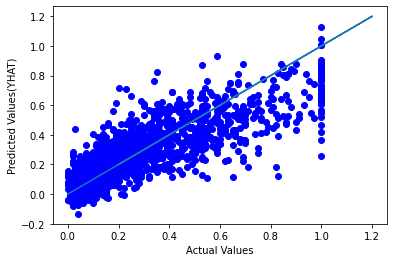

In [30]:
# Plot the correlation between the predicted and actual values of the target attribute.

plt.plot(y, yHat, 'bo')
plt.plot([0,1.2,0.2],[0,1.2,0.2])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values(YHAT)')
plt.show()

In [31]:
np.corrcoef(yHatT, y)

array([[1.        , 0.83360656],
       [0.83360656, 1.        ]])

In [35]:
## 10 fold cross vaidation
lin_reg = LinearRegression()
# Train the model using the training sets
fit_linreg = lin_reg.fit(x_var, y)

# Create the prediction
linreg_p = lin_reg.predict(x_var)
error = abs(linreg_p - y)
totalErr = np.dot(error, error)
rmse_train = np.sqrt(totalErr/len(linreg_p))


# Now let's compute RMSE using 10-fold x-validation
n = 10
#kf = KFold(len(x),n_splits=n)

kf = KFold(n_splits=n)
kf.get_n_splits(x)

#print(kf)  
#KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0
#or train,test in kf:
for train, test in kf.split(x):
    lin_reg.fit(x[train],y[train])
    p = lin_reg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
       
rmse_10cv = xval_err/n

print("Original rmse: {:.8f}".format(rmse_train) , "     10 fold rmse: {:.8f}".format(rmse_10cv))


Original rmse: 0.12869119      10 fold rmse: 0.13589813


## c. Feature Selection: use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression.

For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights

In [36]:
# Create a train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)

In [37]:
y_train.shape


(1594,)

1 0.11311687423270647
6 0.10161771123123191
11 0.10143611386778435
16 0.10151188293290565
21 0.09947901014349206
26 0.09866057027037715
31 0.09778947530573433
36 0.09726265948360677
41 0.09694532318179708
46 0.09768092373591217
51 0.09755830708127304
56 0.0980911518000123
61 0.09865252579040365
66 0.09883931494279079
71 0.09902672428247236
76 0.09891114498141652
81 0.09863681767006674
86 0.09811756164340193
91 0.09830813736813948
96 0.09739148948426005
Optimal percentile of features:41 

Optimal number of features:39 



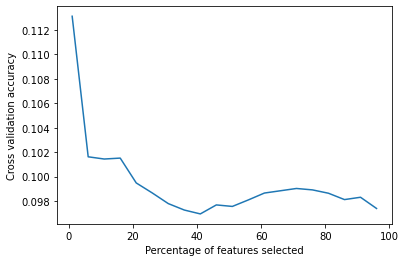

In [39]:
linreg = LinearRegression()

percentiles = range(1, 100, 5)
results = []

for i in range(1, 100, 5):
    fs = SelectPercentile(feature_selection.f_regression, percentile=i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    """ DeprecationWarning: Scoring method 'mean_absolute_error' was renamed to 'neg_mean_absolute_error' in version 0.18 and will be removed in 0.20  """
    scores = abs(model_selection.cross_val_score(linreg, x_train_fs, y_train, cv=5, scoring='neg_mean_absolute_error'))
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.min())[0]
print ("Optimal percentile of features:{0}".format(percentiles[int(optimal_percentile)]), "\n")
optimal_num_features = int(math.floor(percentiles[int(optimal_percentile)]*x.shape[1]/100))
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results,label=' Best Percentile Graph')

In [40]:
# Using optimal percentile

fs = SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train)

In [42]:
df_comm_x = Comms.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis=1, inplace = False)


In [43]:
for i in range(len(df_comm_x.columns.values)):
    if fs.get_support()[i]:
        print (df_comm_x.columns.values[i],'\t\t', fs.scores_[i])

population 		 229.5994387214831
racepctblack 		 992.1643850847802
racePctWhite 		 1304.8806138268185
numbUrban 		 223.6167381922968
medIncome 		 341.30957351605133
pctWWage 		 170.55412925955008
pctWInvInc 		 761.0568397801967
pctWPubAsst 		 783.2243592146212
medFamInc 		 374.4346957111201
perCapInc 		 214.96942659482838
NumUnderPov 		 361.9594023390105
PctPopUnderPov 		 569.4858535418615
PctLess9thGrade 		 296.0320417055503
PctNotHSGrad 		 461.0577920924575
PctBSorMore 		 169.0417896192204
PctUnemployed 		 532.3616336751985
PctEmploy 		 196.38435597335186
MalePctDivorce 		 580.3420144382127
FemalePctDiv 		 693.8626992089273
TotalPctDiv 		 677.2286585312042
PctFam2Par 		 1596.8391699129975
PctKids2Par 		 1901.3001500117093
PctYoungKids2Par 		 1269.9824661860791
PctTeen2Par 		 1231.3207931534812
NumIlleg 		 399.82784277918284
PctIlleg 		 1856.8497011201284
PctLargHouseFam 		 240.00861647110156
PctPersOwnOccup 		 600.098573514707
PctPersDenseHous 		 348.8080905576246
PctHousLess3BR 		 44

In [45]:

# Calculating Mean absolute Error on the testing using 39 informatic features
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train)
linreg = LinearRegression()
linreg.fit(x_train_fs, y_train)
x_test_fs = fs.transform(x_test)
lr_pred = linreg.predict(x_test_fs)
lr_mae = mean_absolute_error(y_test, lr_pred)

print ('Mean absolute Error (MAE) of the testing data is %0.8f' % lr_mae)

Mean absolute Error (MAE) of the testing data is 0.09564769


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_var, y, test_size=0.2, random_state=33)

In [48]:
def calc_params(x, y, param_name, param_values, K, model, model_name):
    
    # Convert input to Numpy arrays
    x = np.array(x)
    y = np.array(y)

    # Initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # Iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # Set classifier parameters
        model.set_params(**{param_name:param_value})
        
        # Initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # Create KFold cross validation
        cv = KFold(len(x), K, shuffle=True, random_state=0)
        
        # Iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # Fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            model.fit([x[k] for k in train], y[train])
            train_predict = model.predict(x[train])
            test_predict = model.predict(x[test])
            
            k_train_scores = mean_absolute_error(y[train], train_predict)
            k_test_scores = mean_absolute_error(y[test], test_predict)
            
        # Store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        
        #print ("Alpha:",param_value)
        #print ("MAE Cross Validation Train:", train_scores[i])
        #print ("MAE Cross Validation Test:", test_scores[i])
        #print ('\n')
       
    # Plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Cross Validation Error")
    plt.title(model_name)
    
    min_err_idx = np.where(test_scores == test_scores.min())
    min_err_alpha = param_values[min_err_idx]
    print ('The minimum MAE using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])

In [49]:
# Alpha values
alpha = np.linspace(0.001, 20, 100)
alpha = np.array([float(e) for e in alpha])

In [50]:
# Ridge and Lasso from sklean
ridge = Ridge()
lasso = Lasso()


In [56]:

p=ridge.predict(x_var)
err=p-y
total_error=np.dot(err,err)
rmse_train=np.sqrt(total_error/len(p))

kf=KFold(len(x_var), n_folds=10)
xval_err=0
for train, test in kf:
    ridge.fit(x_var[train],y[train])
    p=ridge.predict(x_var[test])
    e=p-y[test]
    xval_err+=np.dot(e,e)
rmse_10cv=np.sqrt(xval_err/len(x_var))

print("Ridge Regression")
print('RMSE on training: ', rmse_train)
print('RMSE on 10-fold CV: ', rmse_10cv)

NotFittedError: This Ridge instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [3]:

# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import math

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_regression

In [14]:
Comms = pd.read_csv(r"C:\Users\Owner\Documents\DSC 478\communities.csv")


In [15]:
Comms.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [16]:
Comms.shape

(1994, 100)

In [17]:
# what are the basic statistics for each of the variable?
Comms.describe(include="all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Auburncity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [18]:
# handle missing data
np.sum(np.array(pd.isnull(Comms)),0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
Comms["OtherPerCap"].unique()

array(['0.36', '0.22', '0.28', '0.51', '0.48', '0.24', '0.18', '0.29',
       '0.17', '0.34', '0.35', '0.13', '0.33', '0.2', '1', '0.72', '0',
       '0.19', '0.3', '0.38', '0.14', '0.26', '0.64', '0.25', '0.37',
       '0.16', '0.15', '0.76', '0.4', '0.42', '0.23', '0.31', '0.32',
       '0.5', '0.66', '0.21', '0.7', '0.27', '0.11', '0.55', '0.95',
       '0.03', '0.45', '0.08', '0.43', '0.62', '0.02', '0.41', '?',
       '0.39', '0.88', '0.71', '0.44', '0.47', '0.09', '0.53', '0.1',
       '0.46', '0.05', '0.52', '0.75', '0.06', '0.93', '0.12', '0.77',
       '0.69', '0.86', '0.73', '0.67', '0.84', '0.81', '0.54', '0.59',
       '0.01', '0.68', '0.98', '0.04', '0.61', '0.9', '0.57', '0.49',
       '0.56', '0.07', '0.92', '0.6', '0.94', '0.63', '0.87', '0.79',
       '0.99', '0.58', '0.83', '0.85', '0.8', '0.82', '0.74', '0.65',
       '0.89'], dtype=object)

In [20]:
Comms.dtypes


state                    int64
communityname           object
population             float64
householdsize          float64
racepctblack           float64
                        ...   
PctSameState85         float64
LandArea               float64
PopDens                float64
PctUsePubTrans         float64
ViolentCrimesPerPop    float64
Length: 100, dtype: object

In [21]:
Comms.OtherPerCap = pd.to_numeric(Comms.OtherPerCap, errors='coerce') # coerce arg turns failures into NaN
Comms.dtypes

state                    int64
communityname           object
population             float64
householdsize          float64
racepctblack           float64
                        ...   
PctSameState85         float64
LandArea               float64
PopDens                float64
PctUsePubTrans         float64
ViolentCrimesPerPop    float64
Length: 100, dtype: object

In [22]:
Comms = Comms.dropna(axis=0)

In [23]:
# seperate the target attribute
y = np.array(Comms.ViolentCrimesPerPop)

x = np.array(Comms.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis=1))

In [24]:
x.shape


(1993, 97)

In [25]:
y.shape

(1993,)

In [26]:
# Function from Machine Learning in Action Book

def standRegres(xArr, yArr):
    xMat = np.matrix(xArr); yMat = np.matrix(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    else:
        ws = xTx.I * (xMat.T*yMat)
        return ws

In [27]:
# Prep the x_var set such that we can have a constant
x_var = np.array(x)
x_var = np.array([np.concatenate((v,[1])) for v in x_var])
x_var

array([[0.19, 0.33, 0.02, ..., 0.26, 0.2 , 1.  ],
       [0.  , 0.16, 0.12, ..., 0.12, 0.45, 1.  ],
       [0.  , 0.42, 0.49, ..., 0.21, 0.02, 1.  ],
       ...,
       [0.16, 0.37, 0.25, ..., 0.32, 0.18, 1.  ],
       [0.08, 0.51, 0.06, ..., 0.38, 0.33, 1.  ],
       [0.2 , 0.78, 0.14, ..., 0.3 , 0.05, 1.  ]])

In [28]:

# Perform the standard linear reg
std_reg = standRegres(x_var, y)
# Display the obtained regression coefficients (weights).
std_reg

matrix([[ 1.58394687e-01],
        [-3.02481869e-02],
        [ 2.12229063e-01],
        [-3.97237986e-02],
        [-1.27930326e-02],
        [ 6.36900639e-02],
        [ 1.22194419e-01],
        [-2.23124229e-01],
        [-1.42627637e-01],
        [ 5.64658800e-02],
        [-2.60230134e-01],
        [ 4.65037847e-02],
        [-2.00798143e-01],
        [-2.08126761e-01],
        [ 4.70792802e-02],
        [-1.73534979e-01],
        [ 5.82291674e-02],
        [ 1.05064444e-02],
        [-9.22106451e-02],
        [ 2.72565616e-01],
        [ 9.72713359e-02],
        [-3.26302914e-01],
        [-2.89431388e-02],
        [-3.59461641e-02],
        [ 2.28885702e-02],
        [ 4.31169895e-02],
        [ 3.76737976e-02],
        [ 1.19950473e-01],
        [-1.83693623e-01],
        [-9.47657739e-02],
        [ 5.55240764e-02],
        [ 1.07281673e-01],
        [ 3.24692051e-03],
        [ 2.34646790e-01],
        [-3.87649999e-02],
        [-1.03179240e-02],
        [ 4.87331629e-01],
 

In [ ]:
std_linear

In [29]:
# Compute the RMSE value on the full training data
yHat = x_var * std_reg
yHatT = yHat.T
err = abs(yHatT - y)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err, err.T)

rmse = np.sqrt(total_error/len(yHat))
print(rmse) 
#print(yHatT,y)

[[0.12869119]]


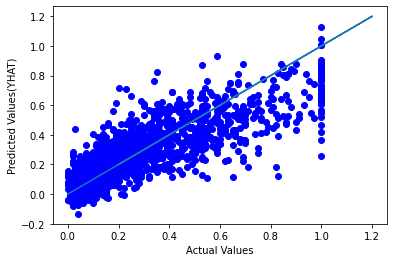

In [30]:
# Plot the correlation between the predicted and actual values of the target attribute.

plt.plot(y, yHat, 'bo')
plt.plot([0,1.2,0.2],[0,1.2,0.2])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values(YHAT)')
plt.show()

In [31]:
np.corrcoef(yHatT, y)

array([[1.        , 0.83360656],
       [0.83360656, 1.        ]])

In [35]:
## 10 fold cross vaidation
lin_reg = LinearRegression()
# Train the model using the training sets
fit_linreg = lin_reg.fit(x_var, y)

# Create the prediction
linreg_p = lin_reg.predict(x_var)
error = abs(linreg_p - y)
totalErr = np.dot(error, error)
rmse_train = np.sqrt(totalErr/len(linreg_p))


# Now let's compute RMSE using 10-fold x-validation
n = 10
#kf = KFold(len(x),n_splits=n)

kf = KFold(n_splits=n)
kf.get_n_splits(x)

#print(kf)  
#KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0
#or train,test in kf:
for train, test in kf.split(x):
    lin_reg.fit(x[train],y[train])
    p = lin_reg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
       
rmse_10cv = xval_err/n

print("Original rmse: {:.8f}".format(rmse_train) , "     10 fold rmse: {:.8f}".format(rmse_10cv))


Original rmse: 0.12869119      10 fold rmse: 0.13589813


## c. Feature Selection: use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression.

For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights

In [36]:
# Create a train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 33)

In [37]:
y_train.shape


(1594,)

1 0.11311687423270647
6 0.10161771123123191
11 0.10143611386778435
16 0.10151188293290565
21 0.09947901014349206
26 0.09866057027037715
31 0.09778947530573433
36 0.09726265948360677
41 0.09694532318179708
46 0.09768092373591217
51 0.09755830708127304
56 0.0980911518000123
61 0.09865252579040365
66 0.09883931494279079
71 0.09902672428247236
76 0.09891114498141652
81 0.09863681767006674
86 0.09811756164340193
91 0.09830813736813948
96 0.09739148948426005
Optimal percentile of features:41 

Optimal number of features:39 



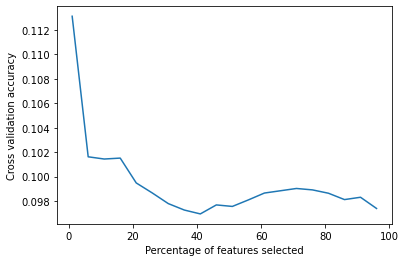

In [39]:
linreg = LinearRegression()

percentiles = range(1, 100, 5)
results = []

for i in range(1, 100, 5):
    fs = SelectPercentile(feature_selection.f_regression, percentile=i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    """ DeprecationWarning: Scoring method 'mean_absolute_error' was renamed to 'neg_mean_absolute_error' in version 0.18 and will be removed in 0.20  """
    scores = abs(model_selection.cross_val_score(linreg, x_train_fs, y_train, cv=5, scoring='neg_mean_absolute_error'))
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.min())[0]
print ("Optimal percentile of features:{0}".format(percentiles[int(optimal_percentile)]), "\n")
optimal_num_features = int(math.floor(percentiles[int(optimal_percentile)]*x.shape[1]/100))
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results,label=' Best Percentile Graph')

In [40]:
# Using optimal percentile

fs = SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train)

In [42]:
df_comm_x = Comms.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis=1, inplace = False)


In [43]:
for i in range(len(df_comm_x.columns.values)):
    if fs.get_support()[i]:
        print (df_comm_x.columns.values[i],'\t\t', fs.scores_[i])

population 		 229.5994387214831
racepctblack 		 992.1643850847802
racePctWhite 		 1304.8806138268185
numbUrban 		 223.6167381922968
medIncome 		 341.30957351605133
pctWWage 		 170.55412925955008
pctWInvInc 		 761.0568397801967
pctWPubAsst 		 783.2243592146212
medFamInc 		 374.4346957111201
perCapInc 		 214.96942659482838
NumUnderPov 		 361.9594023390105
PctPopUnderPov 		 569.4858535418615
PctLess9thGrade 		 296.0320417055503
PctNotHSGrad 		 461.0577920924575
PctBSorMore 		 169.0417896192204
PctUnemployed 		 532.3616336751985
PctEmploy 		 196.38435597335186
MalePctDivorce 		 580.3420144382127
FemalePctDiv 		 693.8626992089273
TotalPctDiv 		 677.2286585312042
PctFam2Par 		 1596.8391699129975
PctKids2Par 		 1901.3001500117093
PctYoungKids2Par 		 1269.9824661860791
PctTeen2Par 		 1231.3207931534812
NumIlleg 		 399.82784277918284
PctIlleg 		 1856.8497011201284
PctLargHouseFam 		 240.00861647110156
PctPersOwnOccup 		 600.098573514707
PctPersDenseHous 		 348.8080905576246
PctHousLess3BR 		 44

In [81]:
from sklearn.metrics import mean_squared_error

# Calculating Mean absolute Error on the testing using 39 informatic features
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train)
linreg = LinearRegression()
linreg.fit(x_train_fs, y_train)
x_test_fs = fs.transform(x_test)
lr_pred = linreg.predict(x_test_fs)
lr_mae = mean_squared_error(y_test, lr_pred)

print ('Mean absolute Error (MAE) of the testing data is %0.8f' % lr_mae)

Mean absolute Error (MAE) of the testing data is 0.01944931


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\Owner\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_var, y, test_size=0.2, random_state=33)

In [82]:
def calc_params(X, Y, param_values, param_name, K, model, model_name):
    X = np.array(X)
    Y = np.array(Y)
    
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    for i, param_value in enumerate(param_values):
        
        model.set_params(**{param_name:param_value})
        
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
    
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        for j, (train, test) in enumerate(cv):
            model.fit([X[k] for k in train], y[train])
            train_predict = model.predict(X[train])
            test_predict = model.predict(X[test])
            
            k_train_scores = mean_absolute_error(y[train], train_predict)
            k_test_scores = mean_absolute_error(y[test], test_predict)
            
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    plt.plot(param_values, train_scores, label = 'Train', alpha = 0.4, lw = 2, c = 'b')
    plt.plot(param_values, test_scores, label = 'X-Val', alpha = 0.4, lw = 2, c = 'r')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation error")
    
    min_err = np.where(test_scores == test_scores.min())
    min_err_alpha = param_values[min_err]
    print('The minimum Mean absolute error is:', test_scores[min_err][0],'alpha is', min_err_alpha[0])

In [75]:
# Alpha values
alpha = np.linspace(0.001, 20, 100)
alpha = np.array([float(e) for e in alpha])

In [76]:
# Ridge and Lasso from sklean
ridge = Ridge()
lasso = Lasso()

In [87]:
calc_params(x_train, y_train, alpha, "alpha", 5 ridge, "Ridge Regression")

SyntaxError: invalid syntax (<ipython-input-87-4c150a73ba45>, line 1)

In [66]:
 # Lasso Regression
calc_params(x_train, y_train, "alpha", alpha, K=5, lasso, "Lasso Regression")

SyntaxError: positional argument follows keyword argument (<ipython-input-66-e25386fe5b2b>, line 2)

In [83]:
from sklearn.metrics import mean_squared_error
ridge = Ridge(fit_intercept = True, alpha = 96.4875879397)
ridge.fit(x_train, y_train)    
pred = ridge.predict(x_test)
mae = mean_squared_error(y_test, pred)
print('Mean absolute error on test data: %0.8f' % mae)

Mean absolute error on test data: 0.02096295


## e. Next, perform regression using Stochastic Gradient Descent for regression.

For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start with creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation).
Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values).
Using the best parameters, apply the model to the set-aside test data.
Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1; l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)

print(x_s)

sgdreg = SGDRegressor(penalty='l2', alpha=0.1, max_iter=300)

# Compute RMSE on training data
sgdreg.fit(x_s,y)
p = sgdreg.predict(x_s)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
#kf = KFold(len(x), n_folds=10)
kf = KFold(n_splits=10)
kf.get_n_splits(x)

KFold(n_splits=n,random_state=None, shuffle=False)
xval_err = 0
for train,test in kf.split(x):
    scaler = StandardScaler()
    scaler.fit(x[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(x[train])
    xtest_s = scaler.transform(x[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y[train])
    p = sgdreg.predict(xtest_s)
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

[[ 1.04322451 -0.8151013  -0.62983779 ...  0.13339736  0.16703946
   0.        ]
 [-0.45398157 -1.85354783 -0.23427886 ... -0.5559994   1.25854648
   0.        ]
 [-0.45398157 -0.26533549  1.22928918 ... -0.11281577 -0.6188456
   0.        ]
 ...
 [ 0.80682355 -0.57076094  0.27994775 ...  0.42885311  0.0797189
   0.        ]
 [ 0.17642099  0.28443032 -0.47161421 ...  0.72430886  0.73462311
   0.        ]
 [ 1.12202483  1.93372776 -0.15516707 ...  0.33036786 -0.48786475
   0.        ]]
Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1329
RMSE on 10-fold CV: 0.1393


In [96]:
sgdr = SGDRegressor()
para = {'penalty': ['l2', 'l1'], 'alpha': np.linspace(0.0001, 200, 400)}

gs = GridSearchCV(sgdr, para, verbose = 1, cv = 5)

In [97]:
%time _ = gs.fit(x_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 29.1 s


[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   28.8s finished


({'alpha': 0.0001, 'penalty': 'l2'}, 0.6278406847840431)

In [98]:
for (i, j) in gs.best_params_.items():
    sgdr.set_params(**{i:j})
    print ("The optimum value of", i, "is estimated as", j, "\n")

The optimum value of alpha is estimated as 0.0001 

The optimum value of penalty is estimated as l2 



In [99]:

sgdr = SGDRegressor(penalty = 'l1', alpha = 0.0001)
sgdr.fit(x_train, y_train)
pred = sgdr.predict(x_test)
mae = mean_squared_error(y_test, pred)

print ('Mean Absolute error of set-aside test data set: %0.8f' % mae)

Mean Absolute error of set-aside test data set: 0.02044067
